Overview of Design:
1. User says input (ex: play some jazz music)
2. Speech-to-text conversion
3. [Intent Classifier]
4. {"intent" : "play_music"}

Objective: To create a classifier (text --> label), trained on labeled data (supervised)

Theoretical Background:
1. Preprocessing: Clean and normalize text to remove irrelevant noise
2. Vectorization: Convert words into numbers. Since models can't understand text, use TF-IDF (Term Frequency-Inverse Document Frequency) to encode term importance
    - TF (Term Frequency): How many times the word appears in the text, TF = (# of times term appers)/(total term # in text)
    - IDF (Inverse Document Frequency): Words that appear commonly across documents are usually less important like 'the' or 'and', IDF(t) = (total document #)/(# of documents containing term t)
    - TF-IDF = TF*IDF
3. Train-Test Split: Separate for evaluation (training/testing), ensures generalization to unseen dta
4. Model Training: Fit a classifier
5. Evaluation: Check accuracy, measuring generalization instead of memorization
6. Save/Load: Serialize model for reuse, enabling deployment for the system

In [11]:
import numpy as np
import pandas as pd


In [12]:
df = pd.read_csv("Intent_Classification_Dataset.csv")
df.head()

,intent,example
0,play_music,Play something by Adele
1,play_music,I want to hear Shape of You
2,play_music,Play the song 'Let it Go' by Adele
3,play_music,Put on some romantic tunes
4,play_music,Can you play classical music?


# Pre-Processing
#### Cleaning Data
1. Make everything lowercase (normalization)
2. Remove Punctuation (remove extra noise)
3. Remove extra spaces (normalization)

Allows for fewer unique word tokens, smaller vocab, more reliable learning

In [13]:
import string

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra spaces
    text = ' '.join(text.split())
    return text

In [14]:
df['example'] = df['example'].apply(preprocess_text) # applies preprocess_text function to entire example column
df.head()

,intent,example
0,play_music,play something by adele
1,play_music,i want to hear shape of you
2,play_music,play the song let it go by adele
3,play_music,put on some romantic tunes
4,play_music,can you play classical music


#### Vectorization
TD-IDF weights rare but informative words higher, turns words into number essentially

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer is a class in scikit-learn for converting a collection of text documents into a matrix of TF-IDF features

In [16]:
vectorizer = TfidfVectorizer() # initializes vectorizer, default params
X = vectorizer.fit_transform(df['example'])
print("Shape:", X.shape)
feature_names = vectorizer.get_feature_names_out()
print("Vocabulary size:", len(vectorizer.get_feature_names_out()))

# Convert to DataFrame for human-friendly view
df_tfidf = pd.DataFrame(X.toarray(), columns=feature_names)

# Look at the first 5 rows
df_tfidf.head()

Shape: (394, 151)
Vocabulary size: 151


,10,100,1400,15,30,630,700,730,about,active,...,want,weather,what,whats,whens,who,with,won,workout,you
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.481666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322272
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.433447


#### Encoding
Since the model doesn't understand labels like "play_music", I can replace each intent with a specific number
This prepares the data for supervised learning

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder()
Y = encoder.fit_transform(df["intent"])
print(Y)
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))



[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
{'adjust_volume': np.int64(0), 'cancel_alarm': np.int64(1), 'get_alarm_status': np.int64(2), 'other_intent': np.int64(3), 'pause_music': np.int64(4), 'play_music': np.int64(5), 'resume_music': np.int6

# Training
Choosing a classifier (picked 5 popular examples)
1. Logistic Regression: Finds a plane that separates classes based on weighted word scores
2. Support Vector Machines (SVM): Finds the best boundary that maximizes margin between classes
3. Decision Tree: Splits data by asking yes/no questins on word features
4. Random Forest: Combines multiple decision trees trained on random subsets
5. Naive Bayes: Assumes all features are independent and uses Bayes theorem

Decision tree / random forest seem to be not great for small datasets (tend to overfit)
Will train the other three and compare results

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(315, 151) (79, 151) (315,) (79,)


#### Logistic Regression
How it works:
1. Learn a vector of weights (one per word)
2. Computes a weighted sum of the TF-IDF vector
3. Uses softmax to turn those into probabilities

Example:
1. It looks at the TF-IDF weights for "play", "billie", "jean"
2. Multiplies them by learned weights
3. Assigns a higher probability to "play_music" than, say, "set_alarm"

In [21]:
from sklearn.linear_model import LogisticRegression


In [22]:
model = LogisticRegression()
model.fit(X_train, Y_train) # train
y_pred = model.predict(X_test) # test
print(y_pred[:10])

[9 1 8 7 3 0 7 8 4 4]


In [23]:
from sklearn.metrics import accuracy_score
# testing
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.94


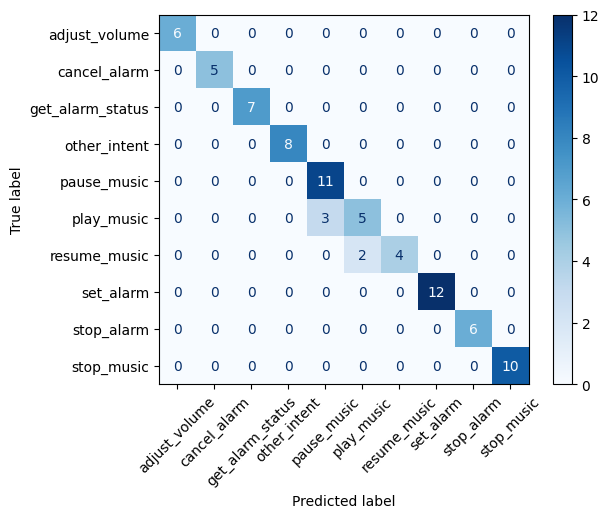

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(xticks_rotation=45, cmap='Blues')


#### Naive Bayes
Types of Naive Bayes
1. Gaussian: Features are continuous and assumed to follow a normal distribution
2. Multinomial: Suitable for discrete data, often representing counts or frequencies
3. Bernoulli: Binary/Boolean features

Chose multinomial because my data isn't continuous nor binary

Formula: P(intent|command) = P(command|intent)*P(intent)

Essentially tries to model how likely the input text is given each class (intent)

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
model = MultinomialNB()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(y_pred[:10])

[9 1 8 7 3 0 7 8 4 4]


In [28]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


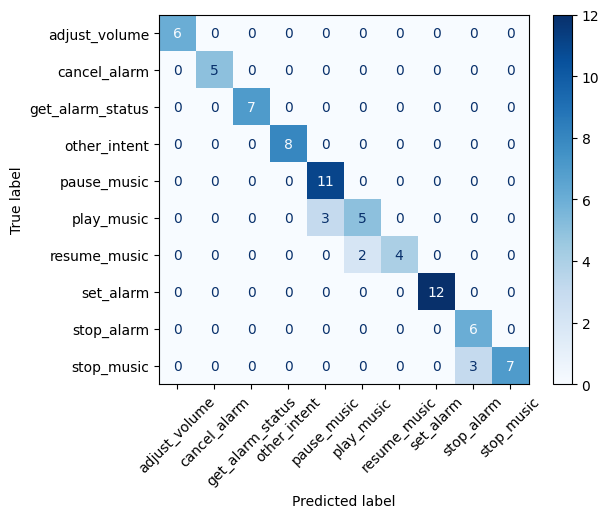

In [29]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(xticks_rotation=45, cmap='Blues')


The Naive Bayes algorithm likely got confused between stop_music and stop_alarm due to the overlap of the word stop and the independence treatment

#### Support Vector Machine

Finds the hyperplane that maximizes the margin between different class clusters

In [30]:
from sklearn.svm import LinearSVC

In [31]:
model = LinearSVC()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(y_pred[:10])

[9 1 8 7 3 0 7 8 4 4]


In [32]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


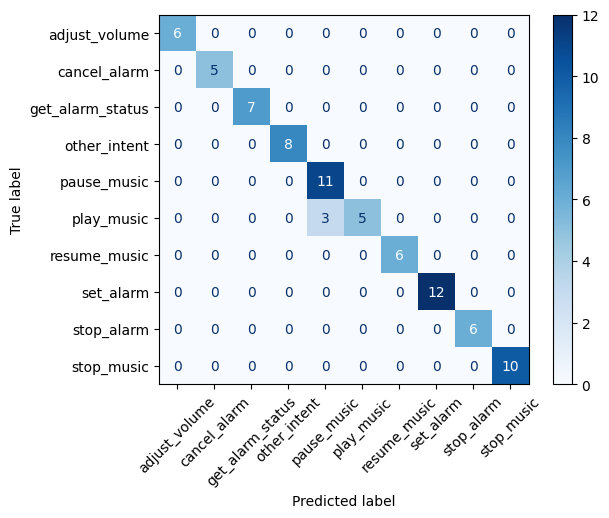

In [33]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(xticks_rotation=45, cmap='Blues')

In [34]:
import joblib
joblib.dump(model, 'intent_classifier.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(encoder, 'label_encoder.pkl')


['label_encoder.pkl']